## $\color{SkyBlue}{\text{Establishing Year Analysis}}$
#### $\color{SkyBlue}{\text{Roman Lynch}}$


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

$\rule{27cm}{0.4pt}$
### K-Means Algorithm

In [2]:
#--------------------------------------------------------------------------------#
def dist(x1, x2):
    return np.sqrt(np.sum(x1-x2)**2)
#--------------------------------------------------------------------------------#

In [3]:
#--------------------------------------------------------------------------------#
def kMeans(df, k, tol=0.0005): 
    """
    Usage: input 
        df=data frame, 
        k=# of clusters
        tol=tolerance for L_2 convergance check on centroids
    """    
    #---------------------------------------#
    #-- Initialize --#
    clusters = np.zeros(len(df))

    #-- k-means ++ --#
    centroids = []
    for i in range(k):
        # To intialize the centroids, we pick k datapoints (reliviley) evenly spaced from 
        # one another by Rank (due to rounding) #
        data_point_rank_k = df[df['Rank'] == np.round((i+1)*(15/k), 0)]
        centroids.append(data_point_rank_k.values[0])
    centroids = np.vstack(centroids)
    print(centroids)
    #----------------#
    
    mean_error = np.inf
    converged = False
    
    num_iterations = 0
    
    #---------------------------------------#
    #-- LOOP UNTIL CONVERGENCE --#
    while not(converged):
        
        #-- Cluster Assignment --#
        for index, data in enumerate(df.values):
            distances = [dist(data, centroid) for centroid in centroids]
            clusters[index] = np.argmin(distances)
        
        #-- Update Centroids --#
        updated_centroids = np.empty((k, df.shape[1]))
        for index in range(k):
            clust_data = df[clusters == index]
            centroid = clust_data.mean(axis=0)
            updated_centroids[index, :] = centroid
            
        #-- Calculate Meanerror --#
        errors = []
        for data, cluster in zip(df.values, clusters):
            centroid = updated_centroids[int(cluster)]
            errors.append(dist(data, centroid)**2)
        
        error_arr = np.array(errors)
        
        #-- Calculate Reconstruction Error --#
        rec_err = np.sum(error_arr)/len(df)
        
        #-- Check for Convergence --#
        if (abs(rec_err - mean_error) < tol):
            converged = True
#             print('Converged at iteration {} with a change of {}'.format(num_iterations, abs(rec_err - mean_error)))
        
        # Update Values
        centroids = updated_centroids
        mean_error = rec_err
        num_iterations = num_iterations + 1
        
    #---------------------------------------#
    return centroids, clusters, mean_error
#--------------------------------------------------------------------------------#

$\rule{27cm}{0.4pt}$ 
### Dataframe Composition

In [4]:
#--------------------------------------------------------------------------------#
# Creating the master data frame

## Read in CSV files
df_rankings = pd.read_csv("data/rankings.csv")
df_teams = pd.read_csv("data/team.csv")

## Only take important columns
df_rankings = df_rankings[['Team', 'Rank', 'Year']]
df_teams = df_teams[['full_name', 'abbreviation', 'city', 'year_founded']]

## Clean "*" from all teams in df_rankings
for i in range(len(df_rankings)):
    if (df_rankings["Team"].iloc[i].find('*')):
        df_rankings["Team"].iloc[i] = df_rankings["Team"].iloc[i].replace('*', '')

## Create the master dataframe by including year_founded, city, team, and rank
df_master = pd.merge(df_rankings,df_teams, left_on="Team", right_on="full_name")
df_master['years_since_founding'] = (df_master['Year'] - df_master['year_founded']).astype(int)
#--------------------------------------------------------------------------------#

print(df_master.head(5))


                    Team  Rank  Year              full_name abbreviation  \
0         Denver Nuggets     1  2023         Denver Nuggets          DEN   
1      Memphis Grizzlies     2  2023      Memphis Grizzlies          MEM   
2       Sacramento Kings     3  2023       Sacramento Kings          SAC   
3           Phoenix Suns     4  2023           Phoenix Suns          PHX   
4  Golden State Warriors     5  2023  Golden State Warriors          GSW   

           city  year_founded  years_since_founding  
0        Denver        1976.0                    47  
1       Memphis        1995.0                    28  
2    Sacramento        1948.0                    75  
3       Phoenix        1968.0                    55  
4  Golden State        1946.0                    77  


In [5]:
#--------------------------------------------------------------------------------#
# Break the data up by year
df_16 = df_master[df_master["Year"] == 2016]
df_17 = df_master[df_master["Year"] == 2017]
df_18 = df_master[df_master["Year"] == 2018]
df_19 = df_master[df_master["Year"] == 2019]
df_20 = df_master[df_master["Year"] == 2020]
df_21 = df_master[df_master["Year"] == 2021]
df_22 = df_master[df_master["Year"] == 2022]
df_23 = df_master[df_master["Year"] == 2023]

print(df_16.shape[0])
print(df_17.shape[0])
print(df_18.shape[0])
print(df_19.shape[0])
print(df_20.shape[0])
print(df_21.shape[0])
print(df_22.shape[0])
print(df_23.shape[0])
#--------------------------------------------------------------------------------#

30
30
30
30
30
30
30
30


$\rule{27cm}{0.4pt}$ 
### Find optimal k value using 2019

[[15 51]]
[[15 51]]
[[15 51]]
[[15 51]]
[[15 51]]
[[15 51]]
[[15 51]]
[[15 51]]
[[15 51]]
[[15 51]]
[[ 8 49]
 [15 51]]
[[ 8 49]
 [15 51]]
[[ 8 49]
 [15 51]]
[[ 8 49]
 [15 51]]
[[ 8 49]
 [15 51]]
[[ 8 49]
 [15 51]]
[[ 8 49]
 [15 51]]
[[ 8 49]
 [15 51]]
[[ 8 49]
 [15 51]]
[[ 8 49]
 [15 51]]
[[ 5 45]
 [10 71]
 [15 51]]
[[ 5 45]
 [10 71]
 [15 51]]
[[ 5 45]
 [10 71]
 [15 51]]
[[ 5 45]
 [10 71]
 [15 51]]
[[ 5 45]
 [10 71]
 [15 51]]
[[ 5 45]
 [10 71]
 [15 51]]
[[ 5 45]
 [10 71]
 [15 51]]
[[ 5 45]
 [10 71]
 [15 51]]
[[ 5 45]
 [10 71]
 [15 51]]
[[ 5 45]
 [10 71]
 [15 51]]
[[ 4 49]
 [ 8 49]
 [11 30]
 [15 51]]
[[ 4 49]
 [ 8 49]
 [11 30]
 [15 51]]
[[ 4 49]
 [ 8 49]
 [11 30]
 [15 51]]
[[ 4 49]
 [ 8 49]
 [11 30]
 [15 51]]
[[ 4 49]
 [ 8 49]
 [11 30]
 [15 51]]
[[ 4 49]
 [ 8 49]
 [11 30]
 [15 51]]
[[ 4 49]
 [ 8 49]
 [11 30]
 [15 51]]
[[ 4 49]
 [ 8 49]
 [11 30]
 [15 51]]
[[ 4 49]
 [ 8 49]
 [11 30]
 [15 51]]
[[ 4 49]
 [ 8 49]
 [11 30]
 [15 51]]
[[ 3 52]
 [ 6 52]
 [ 9 71]
 [12 39]
 [15 51]]
[[ 3 52]
 [ 6 

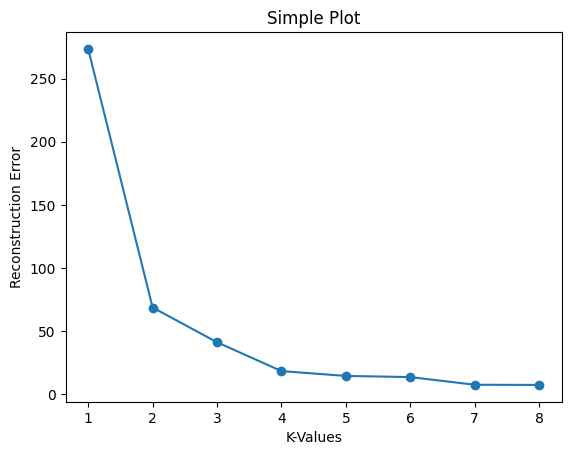

In [8]:
k_values = [1,2,3,4,5,6,7,8]
min_recon_errors_per_k = []

# For all k-values, run k-means 10 times, keeping track of the minimum error found for
# each value of k
##################################################################################
for k in k_values:
    recon_errors = []
    for _ in range(10):
        centroids, clusters, reconstruction_error = kMeans(df_19[["Rank", "years_since_founding"]], k)
        
        recon_errors.append(reconstruction_error)
        
    min_recon_errors_per_k.append(np.min(recon_errors))
##################################################################################

# Plotting the data
plt.plot(k_values, min_recon_errors_per_k, marker='o')

plt.xlabel('K-Values')
plt.ylabel('Reconstruction Error')
plt.title('Simple Plot')

plt.show()

So, as we can see from the above elbow plot, k = 3 is an appropriate k-value to optimize run time while minimizing error

$\rule{27cm}{0.4pt}$ 
### Perform K-means with k = 3

In [14]:
#--------------------------------------------------------------------------------#
## Use k-Means for clustering withk = 3
centroids_23, clusters_23, mean_error_23 = kMeans(df_23[["Rank", "years_since_founding"]], k=3)
centroids_22, clusters_22, mean_error_22 = kMeans(df_22[["Rank", "years_since_founding"]], k=3)
centroids_21, clusters_21, mean_error_21 = kMeans(df_21[["Rank", "years_since_founding"]], k=3)
centroids_20, clusters_20, mean_error_20 = kMeans(df_20[["Rank", "years_since_founding"]], k=3)
centroids_19, clusters_19, mean_error_19 = kMeans(df_19[["Rank", "years_since_founding"]], k=3)
centroids_18, clusters_18, mean_error_18 = kMeans(df_18[["Rank", "years_since_founding"]], k=3)
centroids_17, clusters_17, mean_error_17 = kMeans(df_17[["Rank", "years_since_founding"]], k=3)
centroids_16, clusters_16, mean_error_16 = kMeans(df_16[["Rank", "years_since_founding"]], k=3)
#--------------------------------------------------------------------------------#

[[ 5 77]
 [10 56]
 [15 56]]
[[ 5 48]
 [10 46]
 [15 55]]
[[ 5 73]
 [10 75]
 [15 54]]
[[ 5 53]
 [10 18]
 [15 74]]
[[ 5 45]
 [10 71]
 [15 51]]
[[ 5 16]
 [10 48]
 [15 50]]
[[ 5 47]
 [10 15]
 [15 49]]
[[ 5 46]
 [10 40]
 [15 68]]


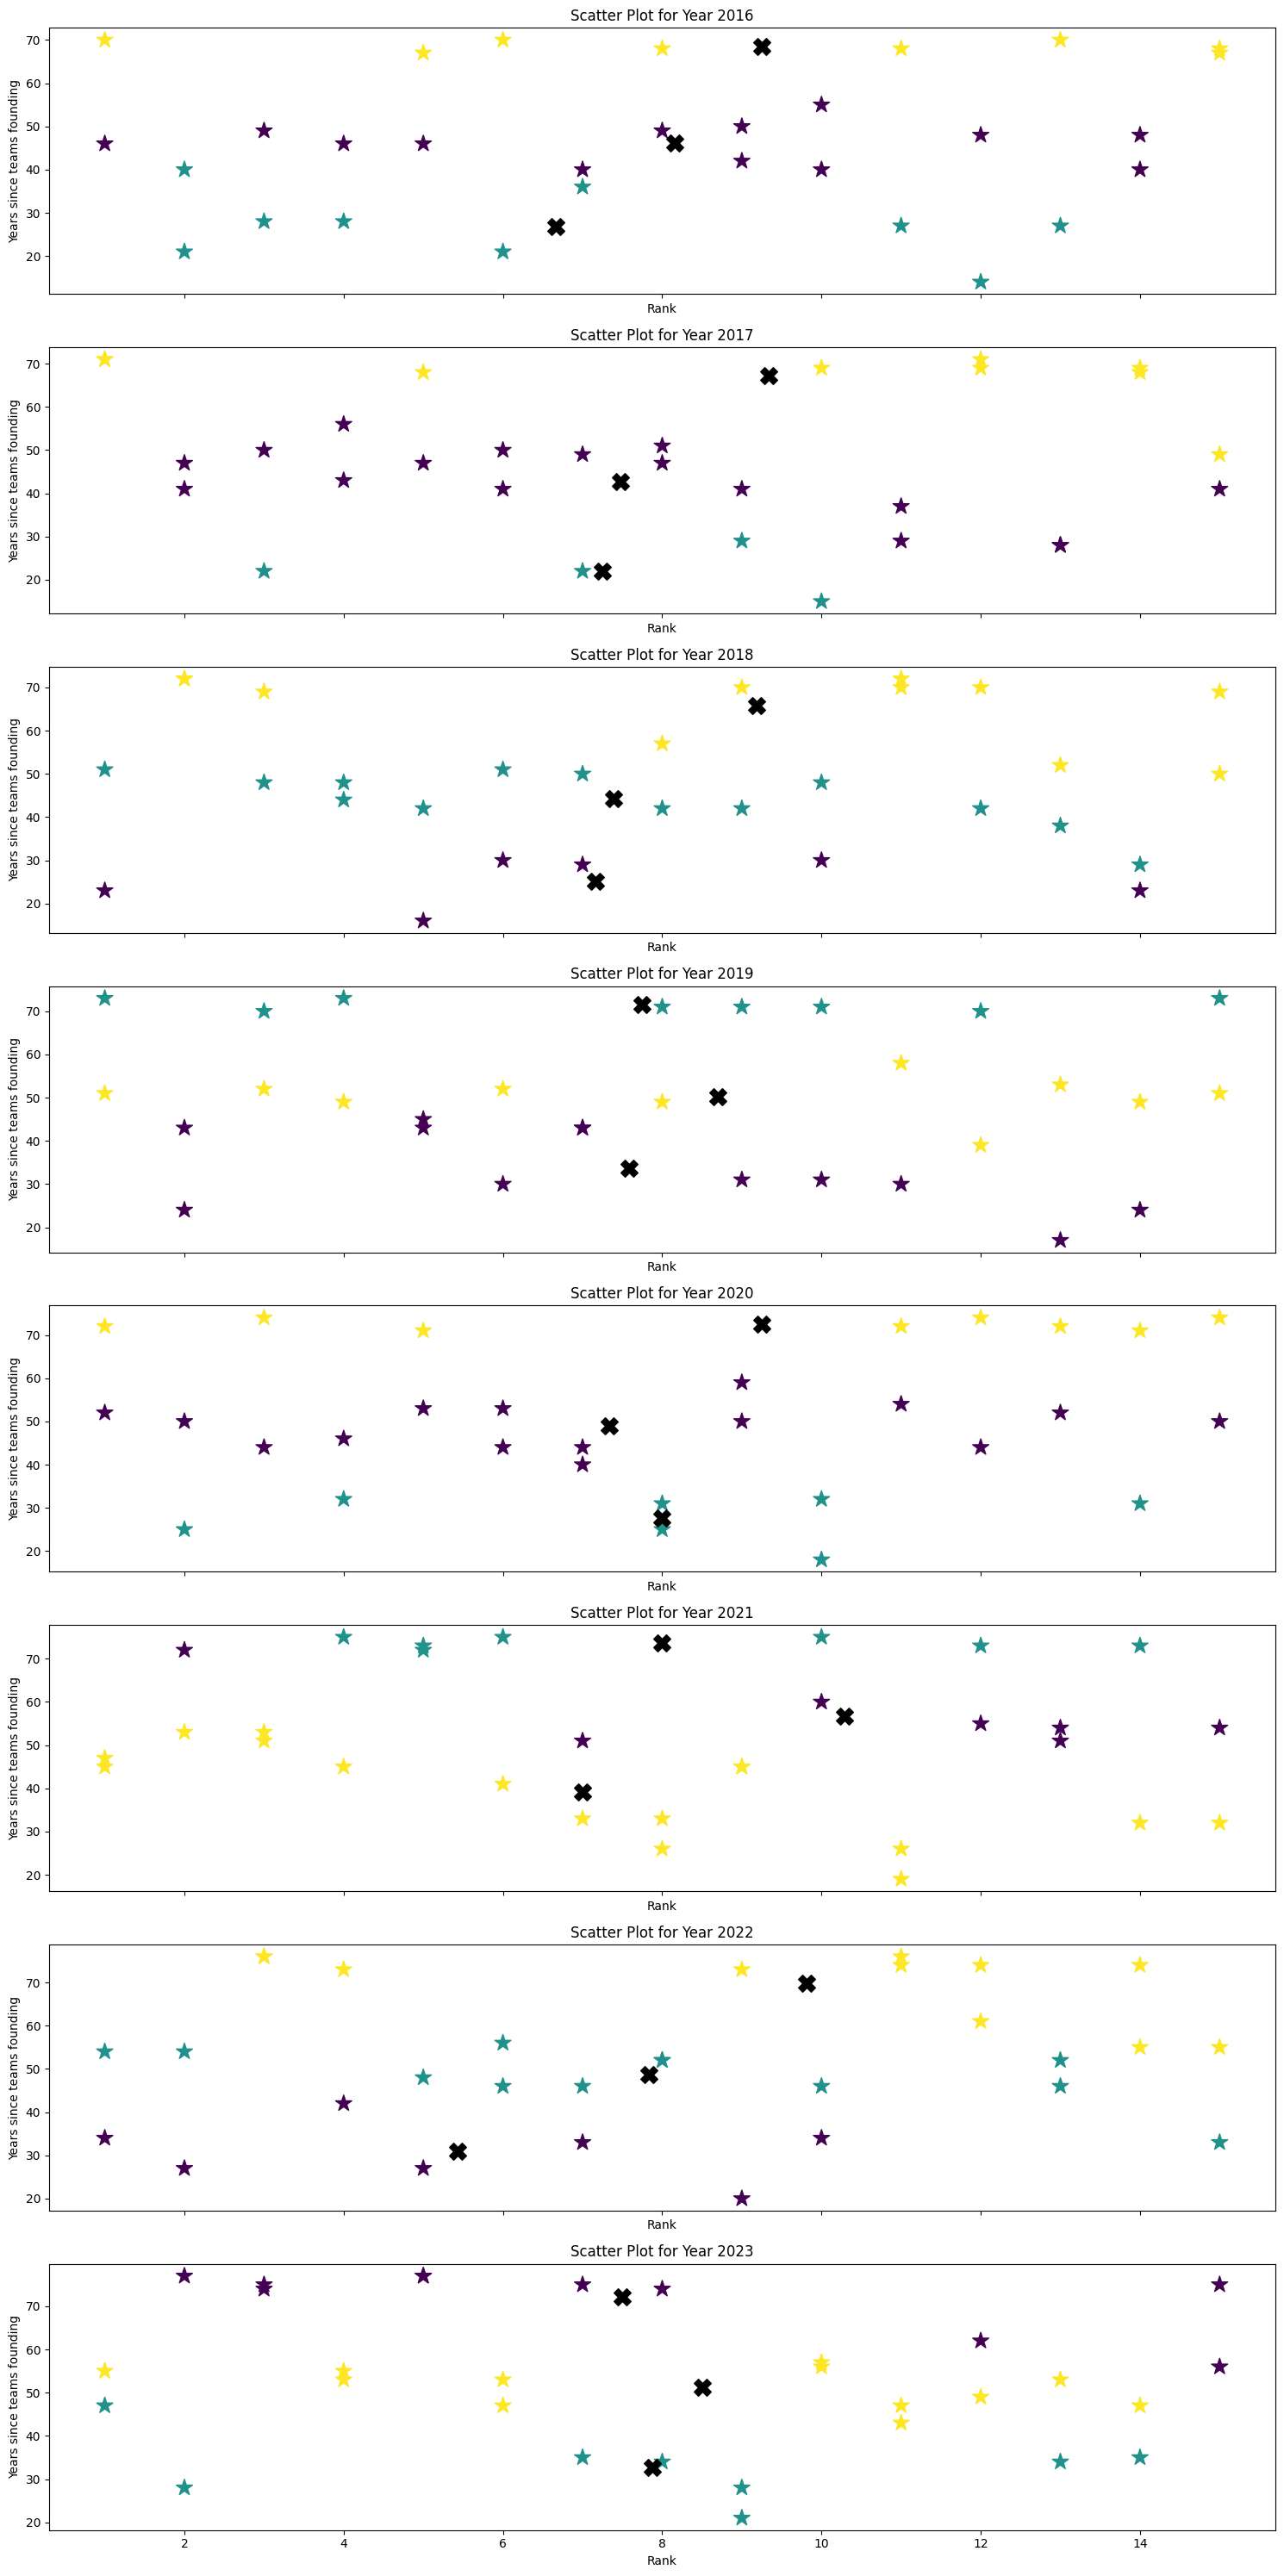

In [15]:
#--------------------------------------------------------------------------------#
# Organize output
dataframes = [df_16, df_17, df_18, df_19, df_20, df_21, df_22, df_23]
clusters = [clusters_16, clusters_17, clusters_18, clusters_19, clusters_20, clusters_21, clusters_22, clusters_23]
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
centroids = [centroids_16, centroids_17, centroids_18,centroids_19,centroids_20, centroids_21, centroids_22, centroids_23]
#--------------------------------------------------------------------------------#

#--------------------------------------------------------------------------------#
# Plot the data

## Initialize Plot
fig, axes = plt.subplots(8, 1, figsize=(15, 30), sharex=True)

## Loop: Scatter Plot for each Year
for i, (year, dataframe, cluster) in enumerate(zip(years, dataframes, clusters)):
    ax = axes[i]
    ax.scatter(dataframe['Rank'], dataframe['years_since_founding'], c=cluster, marker='*', s=200)
    ax.set_xlabel("Rank")
    ax.set_ylabel("Years since teams founding")
    ax.set_title("Scatter Plot for Year " + str(year))
    ## Plot centroids
    ax.scatter(centroids[i][:, 0], centroids[i][:, 1], marker='X', s=200, c='black')

plt.tight_layout()
plt.show()

plt.show()
#--------------------------------------------------------------------------------#

$\rule{27cm}{0.4pt}$ 
### Analysis

As evident by the above scatterplots, there does not appear to be a correlation between the years since the team has been established, and their final rank.

Our hypothesis was that teams that had been around longer, had an advantage over those who did not. For example, more longer established teams would have a higher fan base. They would also likely have more money, and attract more talented players and coaches. If this were to be the case we would see three clusters:
1. High year, high rank
2. Medium year, medium rank
3. Low year, low rank

Across all the scatterplots, this does not appear to be the case. As a result we can conclude that there is no correlation between the years since the team has been established, and their final rank.